<h1 style="color: white; font-size: 25px; font-weight: bold; border-radius: 5px; background-color: #990000;
border-bottom: 8px solid black; padding: 25px 0px 20px 35px; margin-top:20px"> 1 | import libariers and data

</h1>

### <b>I <span style='color:#e60000'>|</span> About dataset</b> 

1 `fixed acidity` : most acids involved with wine or fixed or nonvolatile.

2 `volatile acidity` : the amount of acetic acid in wine .

3 `citric acid` : found in small quantities, citric acid can add freshness and flavor to wines.

4 `residual sugar`: the amount of sugar remaining after fermentation stops.

5 `chlorides` : the amount of salt in the wine.

6 `free sulfur dioxide` : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 `total sulfur dioxide` : amount of free and bound forms of S02; at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 `density` : the density of water that depending on the percent alcohol and sugar content.

9 `pH`: describes how acidic or basic a wine is on a scale from 0 to 14 .

10 `sulphates` : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 `alcohol` : the percent alcohol content of the wine

12 `quality` : output variable (based on sensory data, score between 3 and 8)

### <b>II <span style='color:#e60000'>|</span> Import libraries</b> 


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### <b>III <span style='color:#e60000'>|</span> Import dataset</b> 


In [2]:
data= pd.read_csv(r"data\winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<h1 style="color: white; font-size: 25px; font-weight: bold; border-radius: 5px; background-color: #990000;
border-bottom: 8px solid black; padding: 25px 0px 20px 35px; margin-top:20px"> 2 | data review and understanding

</h1>

In [3]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    missing_values = []
    mean_of_missing = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
        missing_values.append(df[i].isna().sum())
        mean_of_missing.append(df[i].isna().sum()/len(df))
    
    return pd.DataFrame({'Column': col, 'dtype': d_type, 'unique sample': uniques, 'n uniques': n_uniques, 'num of missing': missing_values, 'mean of missing': mean_of_missing })


report(data)

,Column,dtype,unique sample,n uniques,num of missing,mean of missing
0,fixed acidity,float64,"[7.4, 7.8, 11.2, 7.9, 7.3]",96,0,0.0
1,volatile acidity,float64,"[0.7, 0.88, 0.76, 0.28, 0.66]",143,0,0.0
2,citric acid,float64,"[0.0, 0.04, 0.56, 0.06, 0.02]",80,0,0.0
3,residual sugar,float64,"[1.9, 2.6, 2.3, 1.8, 1.6]",91,0,0.0
4,chlorides,float64,"[0.076, 0.098, 0.092, 0.075, 0.069]",153,0,0.0
5,free sulfur dioxide,float64,"[11.0, 25.0, 15.0, 17.0, 13.0]",60,0,0.0
6,total sulfur dioxide,float64,"[34.0, 67.0, 54.0, 60.0, 40.0]",144,0,0.0
7,density,float64,"[0.9978, 0.9968, 0.997, 0.998, 0.9964]",436,0,0.0
8,pH,float64,"[3.51, 3.2, 3.26, 3.16, 3.3]",89,0,0.0
9,sulphates,float64,"[0.56, 0.68, 0.65, 0.58, 0.46]",96,0,0.0


In [4]:
summary_stats = data.describe()
summary_stats.loc[['std', '50%', 'mean']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023


In [5]:
data.duplicated().sum()

240

## <b><span style='color:#e60000'>|</span> Observations:</b>

* Data doesn't have any missing values and all columns are numerical.
* Mean value and median of `PH`, `denisity` and `volatile acidity` columns are equal , they are normal distributions.
* mean value for `quality` column (target) is smaller than value of median.
* Mean value for other columns is larger than 50% (median).that's mean those have right skewed distributation .
* There are `240` duplicated row in data.

<h1 style="color: white; font-size: 25px; font-weight: bold; border-radius: 5px; background-color: #990000;
border-bottom: 8px solid black; padding: 25px 0px 20px 35px; margin-top:30px"> 3 | data cleaning and exploring

</h1>

## <b>I <span style='color:#e60000'>|</span> Drop duplicated rows</b> 


In [6]:
# remove duplicated rows.
data.drop_duplicates(inplace=True)

## <b>II <span style='color:#e60000'>|</span> Univariate analysis</b> 


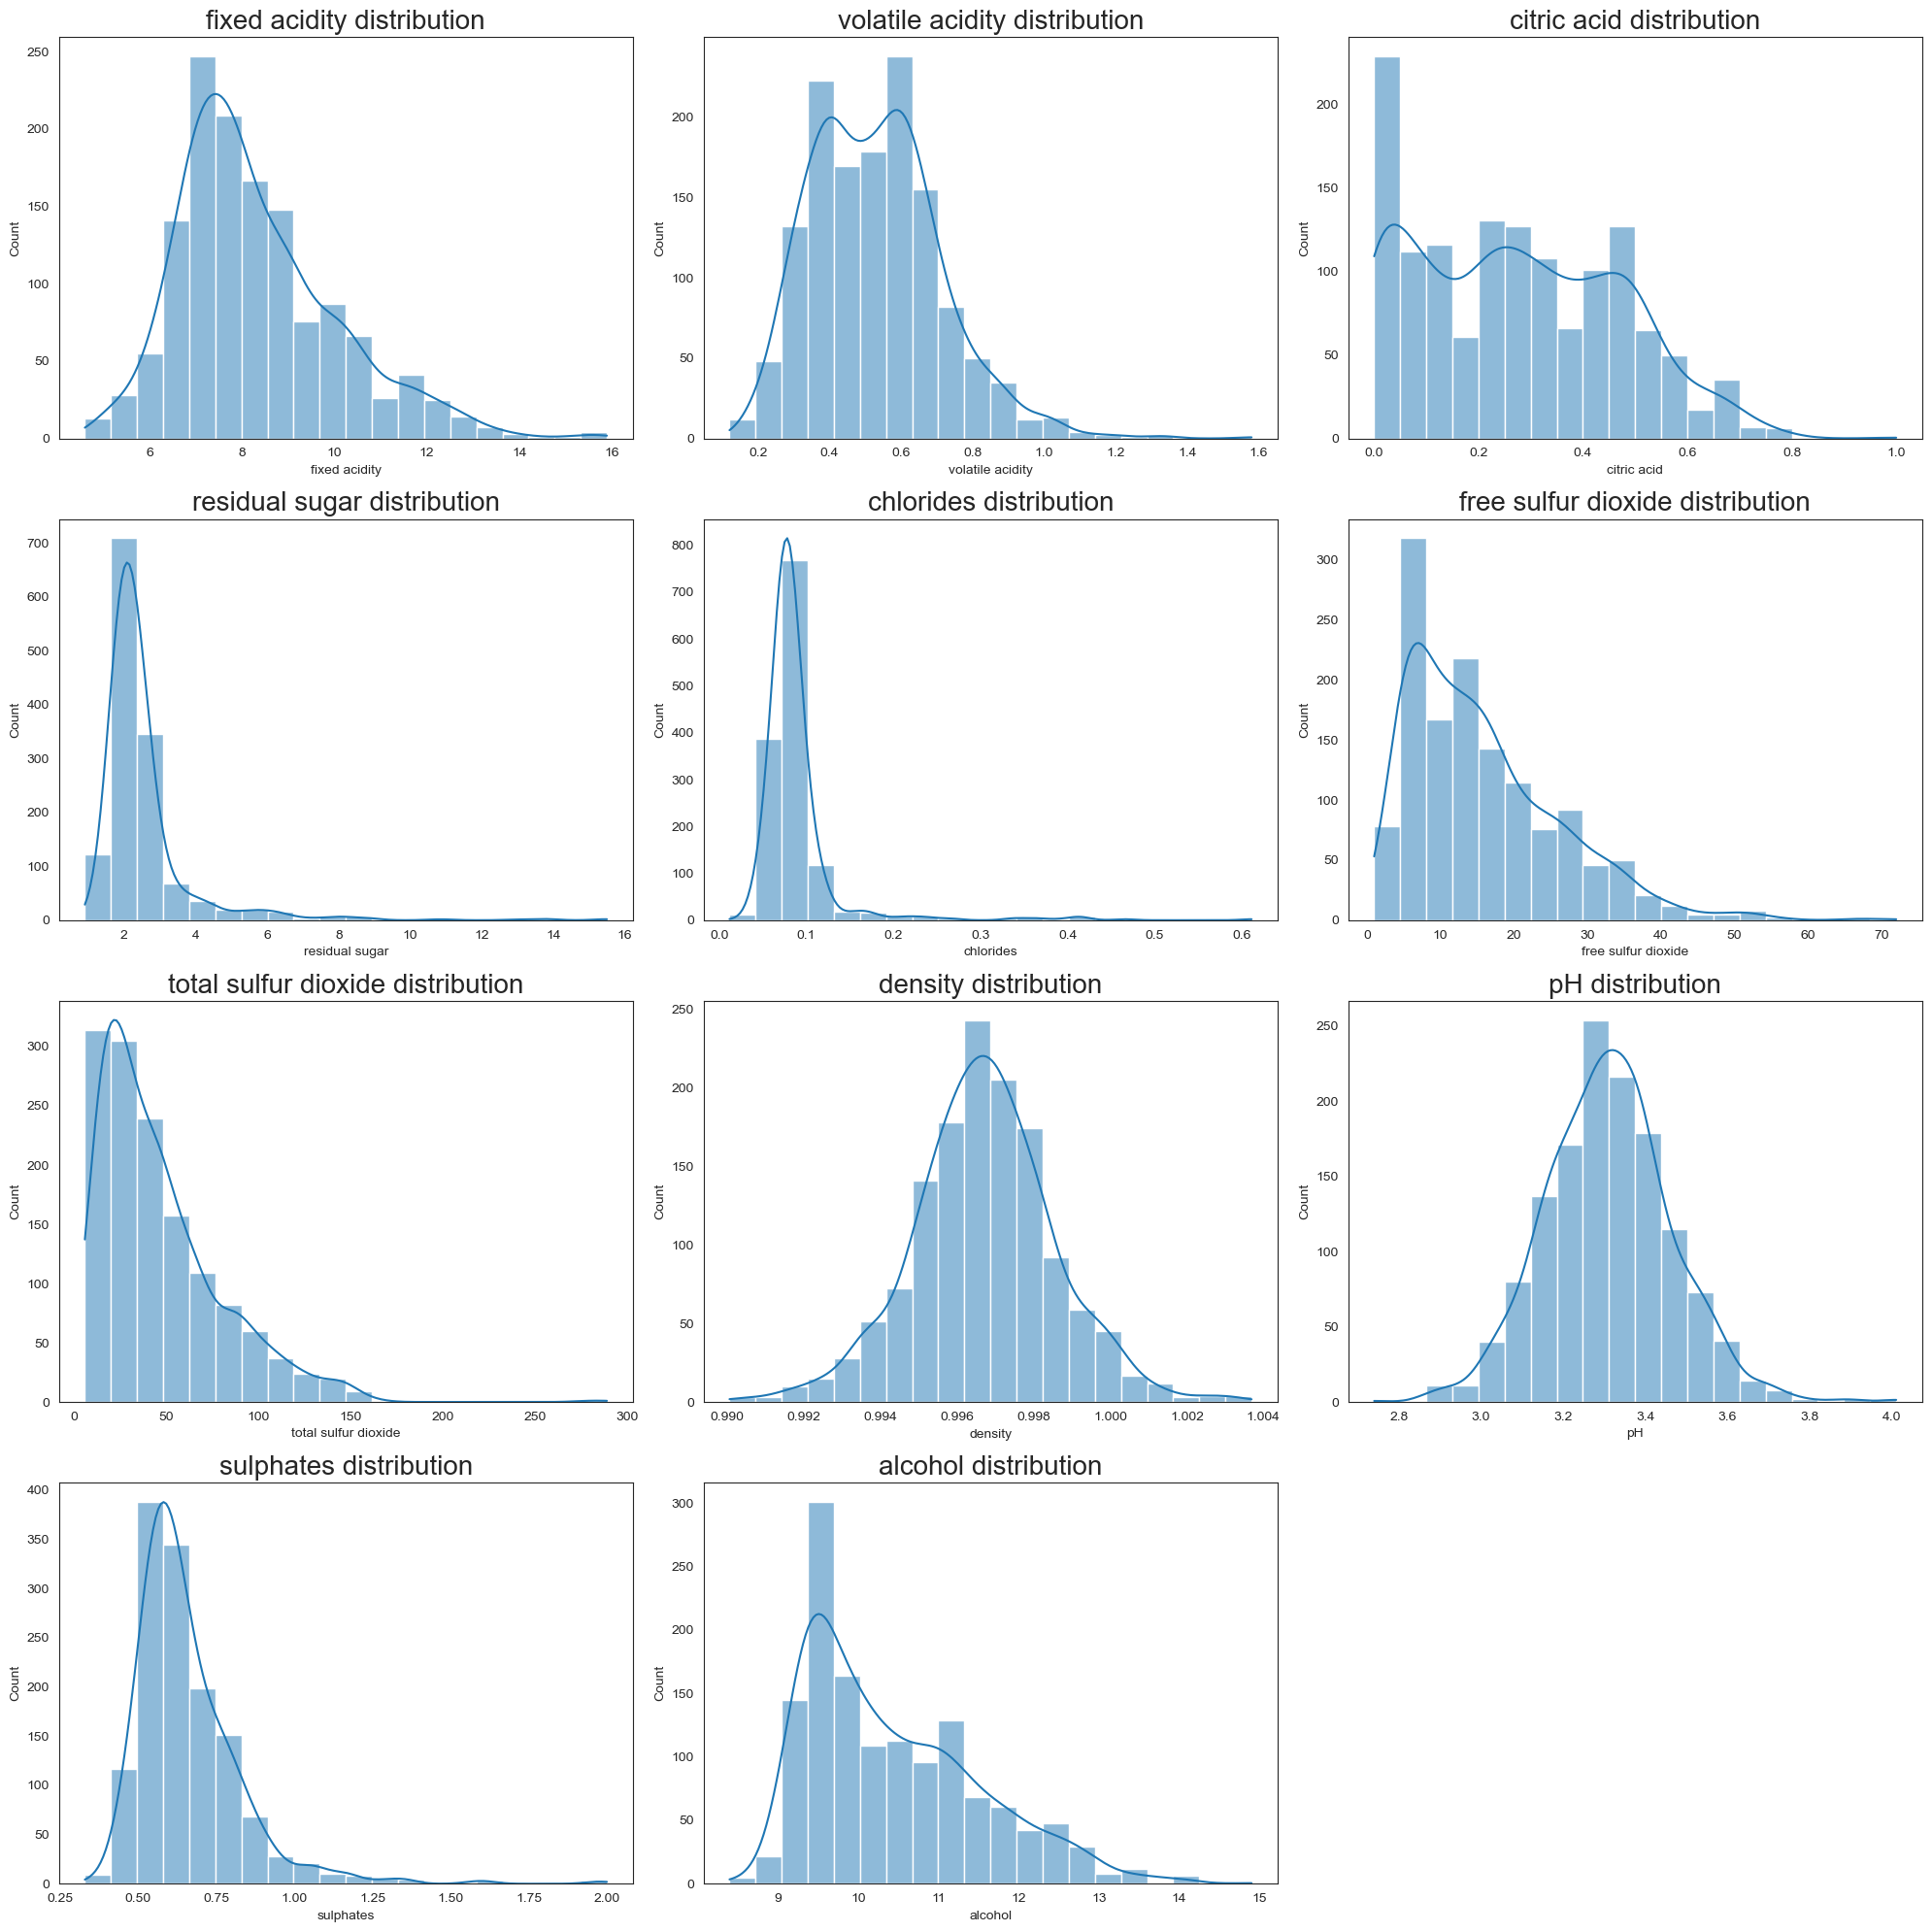

In [7]:
#histgram
sns.set_style("white")
plt.figure(figsize=(20, 20))

i=1 
for col in data.drop(columns='quality').columns:
    
    plt.subplot(4, 3, i)
    sns.histplot(data=data, x=col, kde=True, bins=20, multiple="stack", alpha=.5)  
    plt.title(col+" distribution" ,fontsize=20)
    i=i+1 
    
plt.tight_layout()

In [8]:
def chart_plot(df, feature):
    
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True, palette='CMRmap_r')
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])

the skewness value of pH column = 0.23


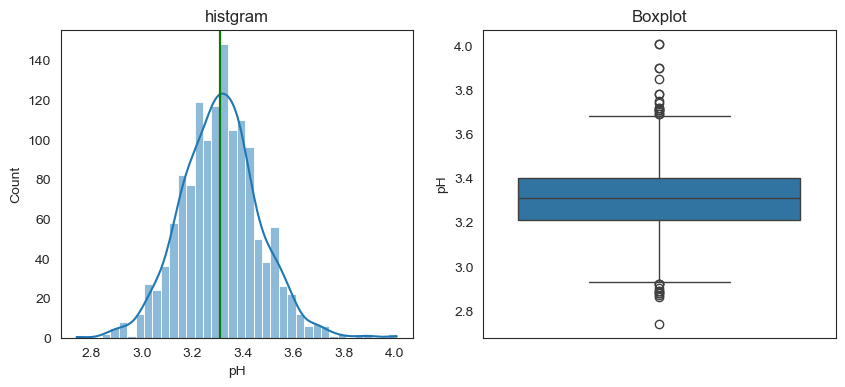

In [9]:
chart_plot(data,"pH")

## <b><span style='color:#e60000'>|</span> Observations:</b>

* `fixed acidity` column looks normal but although its a bit right skewed, similarly with some other features like `sulphates` and `chlorides` columns.
* `Density` and `pH` columns looks normally distributed.
* Some features are not normal as well like `alcohol` and `citric acid` columns.

## <b>III <span style='color:#e60000'>|</span> Handling outliers</b> 

we create function that can deal with outliers by replace outliers with median or mean based on feature's data , or droping outliers .

`residual sugar` and `chlorides` columns have alot of outliers and that is reason of skewness . if outliers are replaced , skewness disappeared.

In [10]:
def deal_with_outliers(df , columns = None):
    
    if columns is None:
        columns = df.select_dtypes(include=['number']).drop(columns= "quality").columns

    for col in columns:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        # replace the outliers with the lower/upper bound with the median or mean of the column
        if df[col].dtype =="int":
            
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].median(), inplace=True)
            
        elif df[col].dtype =="float":
            
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = np.nan
            df[col].fillna(df[col].mean(), inplace=True)
            
    return df.head()

In [11]:
deal_with_outliers(data,columns=['residual sugar','chlorides','volatile acidity'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


the skewness value of chlorides column = 0.23


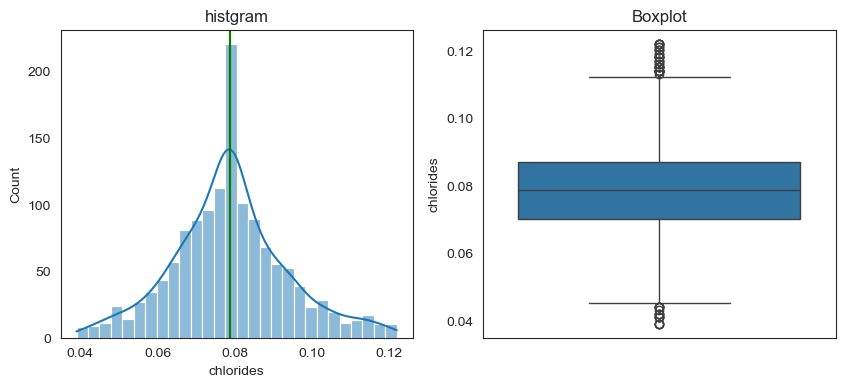

In [12]:
# check
chart_plot(data,'chlorides')

### <b>IV <span style='color:#e60000'>|</span> Handle with skewness</b> 

We will use **Log transformation technique**. It is used to reduce the impect of outliers and skewness.

### **<span style='color:#e60000'> What's log transformation? </span>**

The **<span style='color:#e60000'>log transformation</span>** involves taking the logarithm of the values in a dataset.

**It's useful when:**
* the data spans a large range. 
* the relationship between variables appears to be exponential.
* the logarithm function compresses large values and expands small values, making the distribution more symmetrical. 
* reducing the impact of extreme values.

There are four columns that need to be transformed like `total sulfur dioxide`, `fixed acidity`,
`free sulfur dioxide`, `sulphates'` and `alcohol`.

In [13]:
for col in ['fixed acidity','total sulfur dioxide','free sulfur dioxide','sulphates','alcohol']:
    data[col]=np.log(data[col])

the skewness value of sulphates column = 0.96


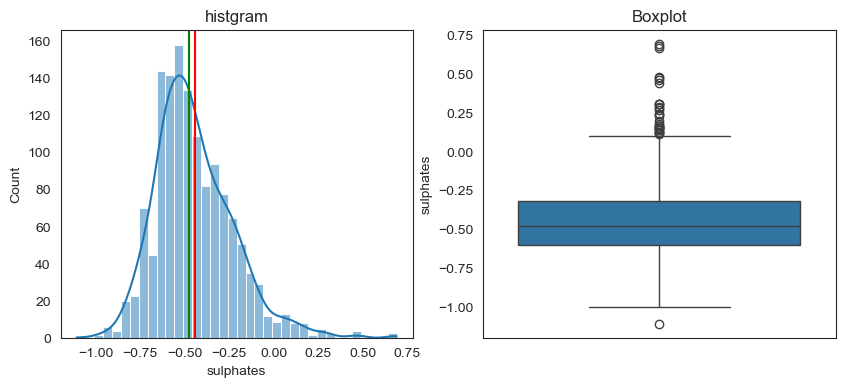

In [14]:
chart_plot(data,'sulphates')

### <b>V <span style='color:#e60000'>|</span> Bivariate analysis</b> 

We will use heatmap and pairplot to know the rlationships between features 
and check if there is multicollinearity or not.

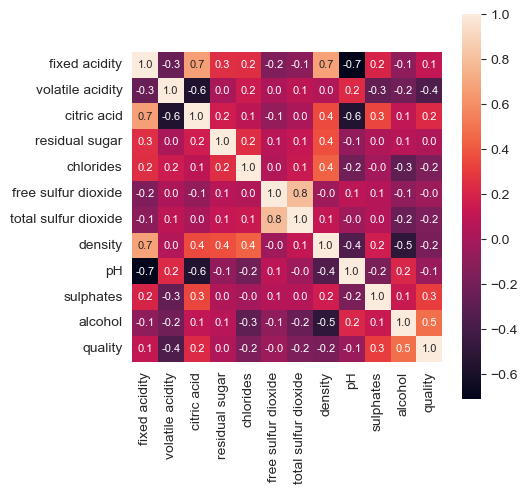

In [15]:
plt.figure(figsize=(5,5))
corr=data.corr()
sns.heatmap(corr, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8});

### <b>VI <span style='color:#e60000'>|</span>explore target column</b> 


In [16]:
values= data["quality"].value_counts().sort_values(ascending=False)
values

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

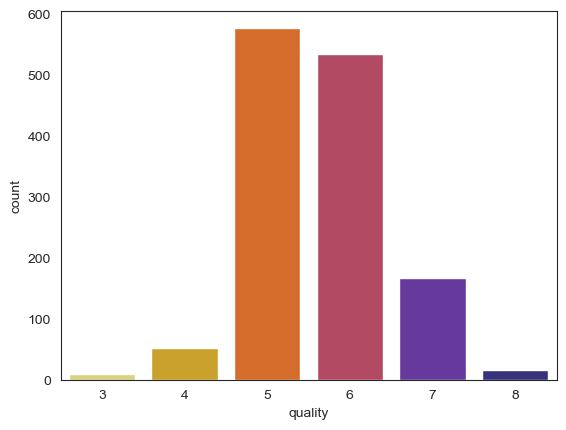

In [17]:
sns.countplot(data=data, x='quality', palette='CMRmap_r')

* Create binary target with 0 (bad quality) and 1 (good quality).

In [18]:
data["quality"] = (data["quality"] > 6.5).astype(int)

data["quality"].value_counts()

0    1175
1     184
Name: quality, dtype: int64

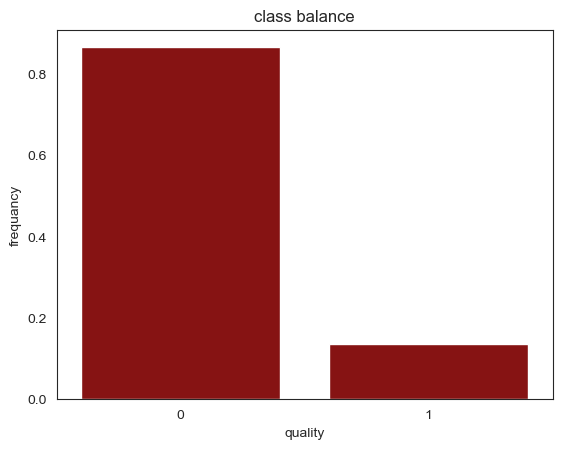

In [19]:
# Plot class balance
plt.style.use('seaborn-deep')
values= data["quality"].value_counts(normalize=True)
sns.barplot(x=values.keys(), y=values.values, color='#990000')
plt.xlabel("quality")
plt.ylabel("frequancy")
plt.title("class balance");

<h1 style="color: white; font-size: 25px; font-weight: bold; border-radius: 5px; background-color: #990000;
border-bottom: 8px solid black; padding: 25px 0px 20px 35px; margin-top:20px"> 4 | Build a model

</h1>

## <b>I <span style='color:#e60000'>|</span> Split data</b> 

In [20]:
target = "quality"
X = data.drop(columns=target)
y = data[target]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y ,
    test_size=0.2,
    random_state=42
)

In [22]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1087, 11)
y_train shape: (1087,)
X_test shape: (272, 11)
y_test shape: (272,)


### <b>II <span style='color:#e60000'>|</span> Iterate</b> 

**Ensemble models** work by building multiple models on random subsets of the same data, and then comparing their predictions to make a final prediction.


## <mark style="background-color:#990000;color:white;font-size:100%;border-radius:3px;opacity:2.0">Random Forest model </mark>

<br>

**<span style='color:#e60000'>Random Forest </span>** is a popular ensemble learning algorithm that combines multiple decision trees to create a more accurate model and can be used for both classification and regression problems. It works by generating a large number of decision trees, each of which makes a prediction about the input data.
Random forest additionally utilizes bagging technique that allows each tree trained on a random sampling of original dataset and takes the majority vote from trees.

▶ **<span style='color:#e60000'>Random Forest common hyperparameters: </span>** 

**n_estimators**: number of trees the algorithm builds before taking the maximum voting or taking the averages of predictions.  a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

**max_features**: maximum number of features random forest considers to split a node.

**min_samples_leaf**: This determines the minimum number of leafs required to split an internal node.

**n_jobs**: tells the engine how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.

<br>

<p style="text-align:center; ">
<img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*fsy57DtqUR_UDOTQKtghkw.png' style='width: 500px; height: 300px;'>
</p>

### **<span style='color:#e60000'> Advantages of Random Forest: </span>**

* it produces a highly accurate classifier.
* It runs efficiently on large databases.
* It can handle thousands of input variables without variable deletion.
* It has an effective method for estimating missing data.
* Classifier doesn't overfit with enough trees.

### **<span style='color:#e60000'> Disadvantages of Random Forest: </span>**

* More trees slow down model.
* Can’t describe relationships within data

[Check it out for more about Random forest](https://builtin.com/data-science/random-forest-algorithm).


In [23]:
RF_classifer = RandomForestClassifier()
RF_classifer.fit(X_train,y_train)

RF_y_pred = RF_classifer.predict(X_test)

print('Model accuracy score with criterion entropy: {:0.2%}'. format(accuracy_score(y_test, RF_y_pred)))

Model accuracy score with criterion entropy: 91.54%


* By default, the number of trees in our forest (n_estimators) is set to 100. That means when we train this classifier, we'll be fitting 100 trees. While it will take longer to train, it will hopefully lead to better performance.

<br>

In order to get the best performance from our model, we need to tune its hyperparameter. But how can we do this if we haven't created a validation set? The answer is cross-validation. So, before we look at hyperparameters, let's see how cross-validation works with the classifier we just built.

## <mark style="background-color:#990000;color:white;font-size:100%;border-radius:3px;opacity:2.0">Hyperparameter Tuning </mark>

<br>
To understand how to optimize your model built using the previous section using the GridSearchCV, you need to understand what is cross validation frist.

### **<span style='color:#e60000'> Cross-Validation: </span>**


Cross-validation is used to estimate the performance of a model on unseen data. It helps assess how well the model generalizes to unseen data. The basic idea behind cross-validation is to split the available dataset into multiple subsets or folds.

<br>


* **`For small datasets`**, you should run cross-validation.
* **`For larger datasets`**, a single validation set is sufficient. Your code will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

<br>

<div style="border-radius:10px;border:#e60000 solid;padding: 15px;background-color:#ffffff00;font-size:100%;text-align:left">
if your model takes a couple minutes or less to run, it's probably worth switching to cross-validation.
    
<br>
    
you can run cross-validation and see if the scores for each experiment seem close. If each experiment yields the same results, a single validation set is probably sufficient.    
</div>
<br>


The most common type is  $k-fold$  cross-validation. In  $k-fold$  cross-validation, the data is divided into $k$ equal-sized folds. The model is trained on $k$-1 folds and tested on the remaining fold.

This process is repeated $k$ times, with each fold serving as the test set once. The performance metric is then averaged across all the folds to get an estimate of the model's performance.

<p style="text-align:center; ">
<img src='https://i.stack.imgur.com/1fXzJ.png' style='width: 700px; height: 300px;'>
</p>
<br>

<mark style="background-color:#990000;color:white;font-size:100%;border-radius:3px;opacity:2.0">Note that: </mark>

Calculate the value of mean and standard deviation of averaged across all the folds.

Model with $K-Fold$ Cross Validation should have a good mean accracy and a low value of standard deviation. 

* values of std is extremely low, which means that our model has a very low variance, the model performed good on all test sets. which mean that our model has no overfitting.


 Perform cross-validation with your classifier. We want five folds, so set cv to 5. We also want to speed up training, to set n_jobs to -1.

In [24]:
cv_acc_scores = cross_val_score(RF_classifer ,X_train ,y_train ,cv = 5 ,n_jobs=-1)
print(cv_acc_scores)

[0.86697248 0.87155963 0.89400922 0.83870968 0.85714286]


### **<span style='color:#e60000'> Grid search: </span>**


Now that we have an idea of how cross-validation works, let's tune our model. The first step is creating a range of hyperparameters that we want to evaluate. And Create a `GridSearchCV` model that includes your classifier and hyperparameter grid.

Grid search is used for hyperparameter tuning, where a predefined set of hyperparameters is explored to find the combination that yields the best performance. It is often used in conjunction with cross-validation to evaluate the performance.

[Click here for more](https://towardsdatascience.com/tuning-the-hyperparameters-of-your-machine-learning-model-using-gridsearchcv-7fc2bb76ff27)

<p style="text-align:center; ">
<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*a4ENJEahtQsSKS3pWoaKLg.png' style='width: 700px; height: 300px;'>
</p>

In [25]:
#our hyperparameter grid
params = {
    "n_estimators":range(25,100,25),
    "max_depth":range(10,50,10)  
}
model = GridSearchCV(
    RF_classifer,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [26]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [27]:
#Extract the cross-validation results from model and load them into a DataFrame named cv_results.

cv_results = pd.DataFrame(model.cv_results_)
print(len(cv_results))
cv_results.head()

12


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048237,0.003339,0.004351,0.000621,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.853211,0.853211,0.884793,0.829493,0.884793,0.861100,0.021195,11
1,0.108405,0.009083,0.008123,0.001885,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.889908,0.857798,0.880184,0.852535,0.880184,0.872122,0.014389,3
2,0.183668,0.004969,0.013516,0.000373,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.880734,0.848624,0.889401,0.843318,0.857143,0.863844,0.018090,8
3,0.063727,0.002646,0.006194,0.001078,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.876147,0.857798,0.903226,0.843318,0.870968,0.870291,0.020015,4
4,0.129667,0.008206,0.009529,0.002013,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.871560,0.844037,0.880184,0.852535,0.875576,0.864778,0.014000,7


In addition to the accuracy scores for all the different models we tried during our grid search, we can see how long it took each model to train. Let's take a closer look at how different hyperparameter settings affect training time.

let's only look at models where max_depth equals 10.

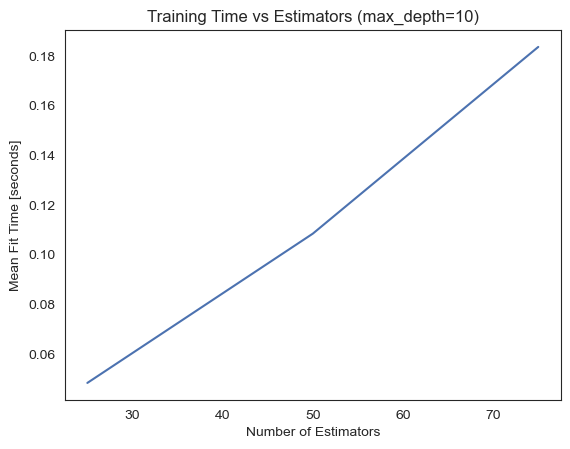

In [28]:
# Create mask
mask = cv_results["param_max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]["param_n_estimators"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

* The higher number of estimator, the higher mean fit time

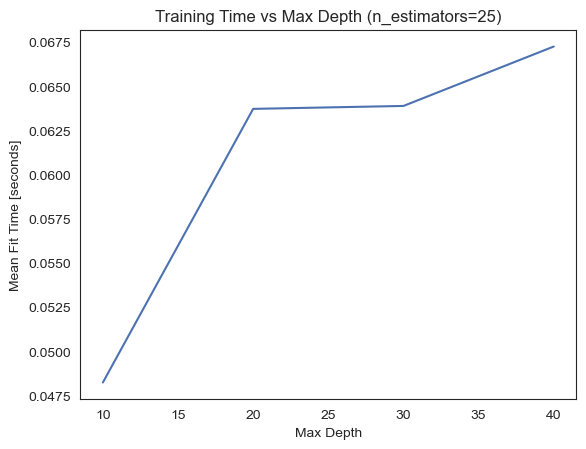

In [29]:
# Create mask
mask = cv_results["param_n_estimators"]==25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]["param_max_depth"],
    cv_results[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

Finally, let's look at the hyperparameters that led to the best performance. 

In [30]:
# Extract best hyperparameters
print(model.best_params_)
print("-------------")
print(model.best_score_)
print("-------------")
print(model.best_estimator_)

{'max_depth': 40, 'n_estimators': 50}
-------------
0.8739525641567665
-------------
RandomForestClassifier(max_depth=40, n_estimators=50)


### <b>III <span style='color:#e60000'>|</span> Evaluate</b> 


In [31]:
#Calculating the training and test accuracy scores for model.
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9154


Next, we're going to use a confusion matrix to see how our model performs. To better understand the values we'll see in the matrix, let's first count how many observations in our test set belong to the positive and negative classes

In [32]:
y_test.value_counts()

0    238
1     34
Name: quality, dtype: int64

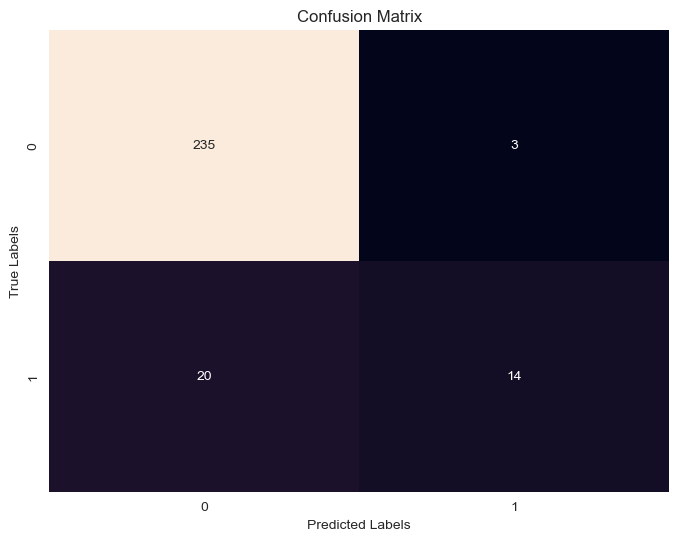

In [33]:
# Create a confusion matrix
cm = confusion_matrix(y_test,model.predict(X_test))

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

If you sum the values in the bottom row, you get the total number of positive observations in y_test (20+14=34). And the top row sum to the number of negative observations ( 235+3=238).

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test,model.predict(X_test))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, model.predict(X_test), average='weighted')
recall = recall_score(y_test, model.predict(X_test), average='weighted')
f1 = f1_score(y_test, model.predict(X_test), average='weighted')

# Create a classification report
report = classification_report(y_test, model.predict(X_test))

# Print evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

# Print classification report
print("Classification Report:\n", report)

Accuracy: 0.9154
Precision: 0.9093
Recall: 0.9154
F1-score: 0.9028
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       238
           1       0.82      0.41      0.55        34

    accuracy                           0.92       272
   macro avg       0.87      0.70      0.75       272
weighted avg       0.91      0.92      0.90       272



### <b>IV <span style='color:#e60000'>|</span> Communicate result</b> 


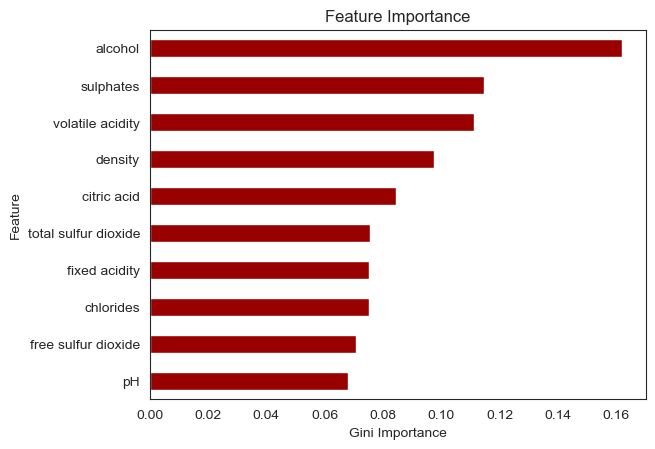

In [35]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()

# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh",color='#990000')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

<h1 style="color: white; font-size: 25px; font-weight: bold; border-radius: 5px; background-color: #990000;
border-bottom: 8px solid black; padding: 25px 0px 20px 35px; margin-top:20px"> 5 | Conclusion

</h1>


***

<br>

<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>/

<br>


<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you find this notebook useful, I'd greatly appreciate your upvote!
   </span>
</div>
